Algorismo probabilistico

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import re

In [ ]:
def extract_day_from_filename(filename):
    # Extraer el número antes de .png usando una expresión regular
    match = re.search(r'_(\d+)\.png$', filename)
    if match:
        return int(match.group(1))
    return None

def guardar_paths_por_dia(directorio):
    paths_imagenes_dia1 = []
    paths_imagenes_dia2 = []
    paths_imagenes_dia3 = []

    for nombre_archivo in os.listdir(directorio):
        # Crear el path completo del archivo
        path_completo = os.path.join(directorio, nombre_archivo)

        # Extraer el día del nombre del archivo
        dia = extract_day_from_filename(nombre_archivo)

        if dia == 1:
            if os.path.isfile(path_completo) and path_completo.lower().endswith('.png'):
                paths_imagenes_dia1.append(path_completo)
        elif dia == 2:
            if os.path.isfile(path_completo) and path_completo.lower().endswith('.png'):
                paths_imagenes_dia2.append(path_completo)
        elif dia == 3:
            if os.path.isfile(path_completo) and path_completo.lower().endswith('.png'):
                paths_imagenes_dia3.append(path_completo)

    return paths_imagenes_dia1, paths_imagenes_dia2, paths_imagenes_dia3



In [ ]:
directorio = '/content/incendio'
paths_dia1, paths_dia2, paths_dia3 = guardar_paths_por_dia(directorio)

print("Paths para el día 1:", paths_dia1)
print("Paths para el día 2:", paths_dia2)
print("Paths para el día 3:", paths_dia3)

Paths para el día 1: ['/content/incendio/Incendio_180_33_dia_1.png', '/content/incendio/Incendio_45_6_dia_1.png', '/content/incendio/Incendio_180_6_dia_1.png', '/content/incendio/Incendio_90_21_dia_1.png', '/content/incendio/Incendio_135_6_dia_1.png', '/content/incendio/Incendio_45_33_dia_1.png', '/content/incendio/Incendio_180_21_dia_1.png', '/content/incendio/Incendio_135_21_dia_1.png', '/content/incendio/Incendio_90_33_dia_1.png', '/content/incendio/Incendio_90_6_dia_1.png', '/content/incendio/Incendio_135_33_dia_1.png', '/content/incendio/Incendio_45_21_dia_1.png']
Paths para el día 2: ['/content/incendio/Incendio_90_33_dia_2.png', '/content/incendio/Incendio_45_21_dia_2.png', '/content/incendio/Incendio_180_6_dia_2.png', '/content/incendio/Incendio_180_33_dia_2.png', '/content/incendio/Incendio_45_6_dia_2.png', '/content/incendio/Incendio_135_21_dia_2.png', '/content/incendio/Incendio_90_6_dia_2.png', '/content/incendio/Incendio_180_21_dia_2.png', '/content/incendio/Incendio_90_21

In [9]:
def save_accumulated_probability_images(overlap_probabilities, output_prefix):
    # Get sorted unique probabilities (highest to lowest)
    unique_probabilities = np.unique(overlap_probabilities)
    unique_probabilities = unique_probabilities[unique_probabilities != 0]
    unique_probabilities = sorted(unique_probabilities, reverse=True)

    # Accumulate probabilities
    for i, prob in enumerate(unique_probabilities):
        # Create a binary mask for the current probability and all higher ones
        mask = overlap_probabilities >= prob

        # Invert the colors (black for figure, white for background)
        output_image = np.uint8(~mask * 255)

        # Save the image
        output_filename = f"{output_prefix}_probability_{prob:.2f}.png"
        Image.fromarray(output_image).save(output_filename)
        #print(f"Saved {output_filename}")

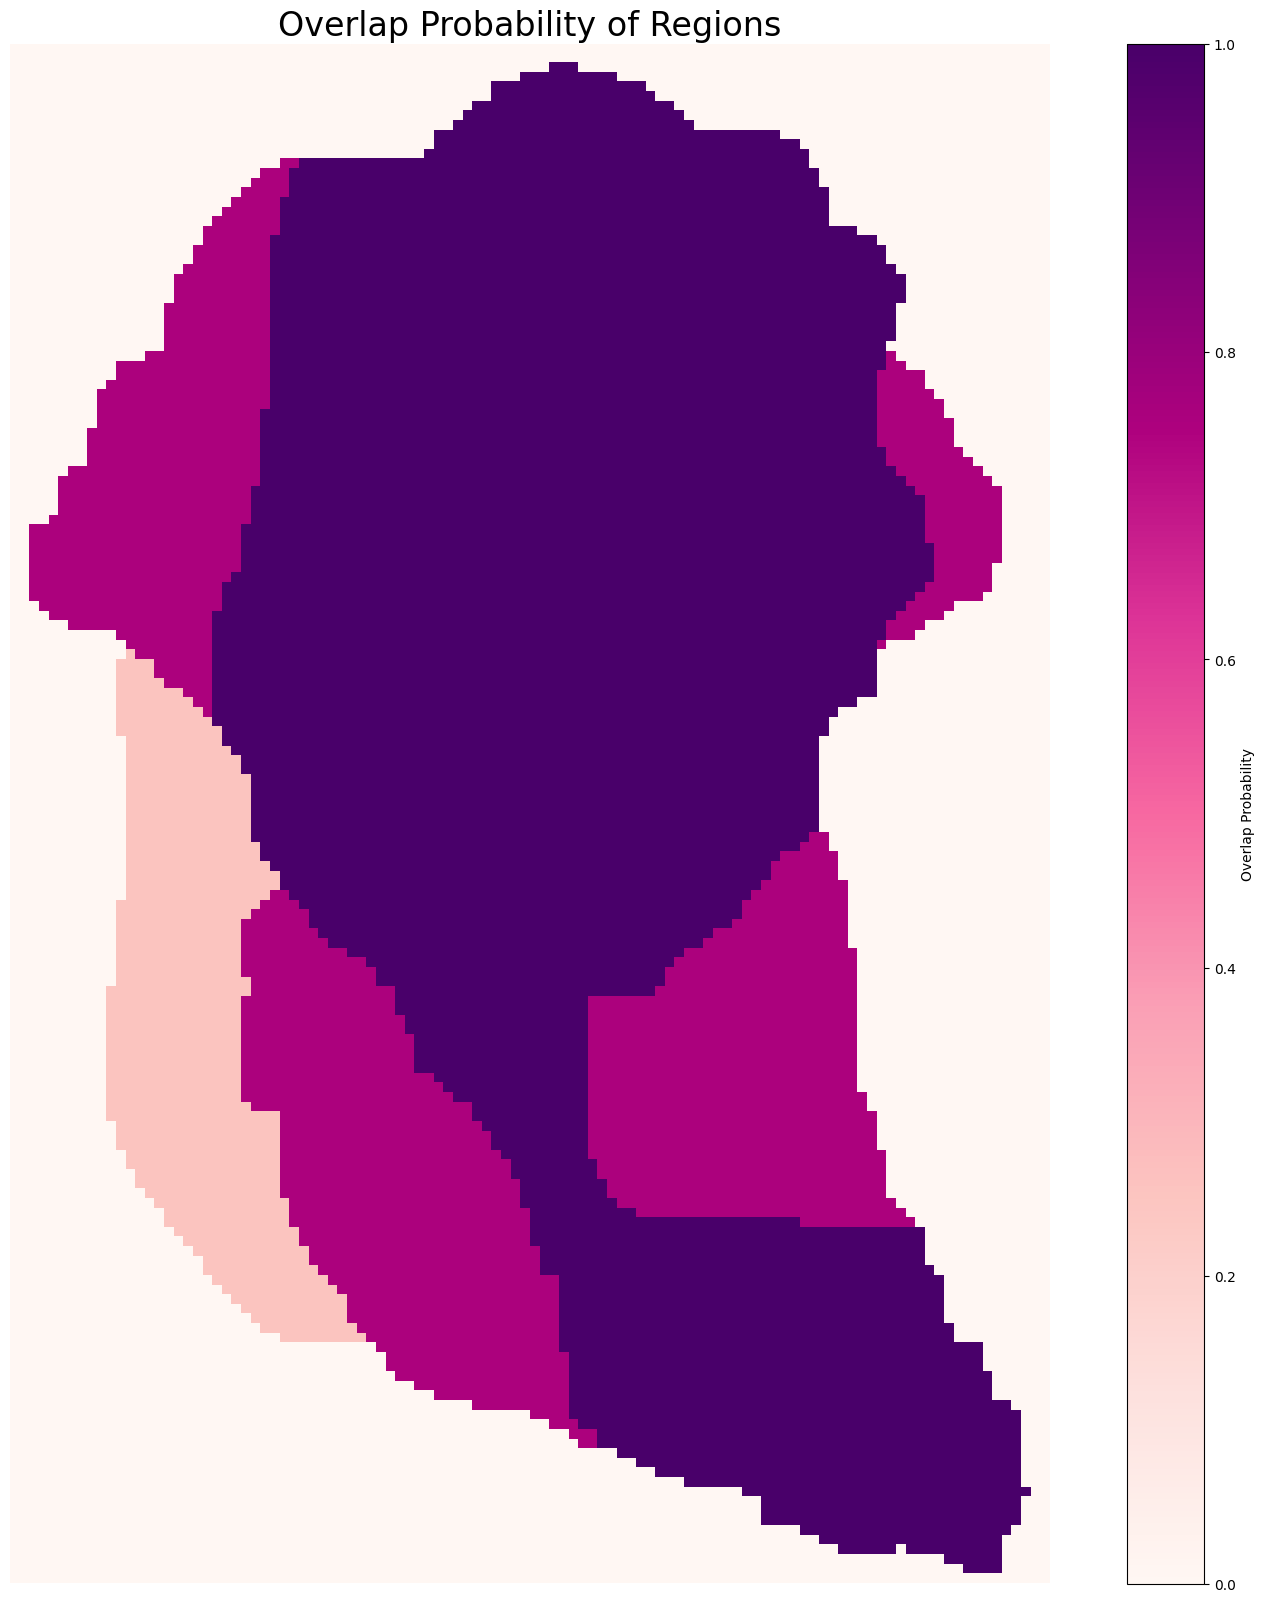

In [11]:
def calculate_overlap_probabilities(file_paths, output_image_path):
    # Initialize variables
    num_images = len(file_paths)
    all_masks = []
    max_shape = (0,0,0)

    for file_path in file_paths:
        # Load the image and convert it to grayscale
        image = Image.open(file_path).convert('L')
        # Convert the grayscale image to a binary mask
        mask = np.array(image) < 128  # adjust threshold if needed
        all_masks.append(mask)

    # Stack all masks together
    masks_stack = np.stack(all_masks)

    # Sum masks to see overlapping regions
    overlap_counts = np.sum(masks_stack, axis=0)

    # Compute probabilities based on overlaps
    overlap_probabilities = overlap_counts / num_images

    # Plot the overlap probabilities
    fig, ax = plt.subplots(figsize=(20, 20))  # Puedes ajustar el tamaño según tus necesidades

    # Mostrar la imagen con el colormap 'RdPu' y sin interpolación
    cax = ax.imshow(overlap_probabilities, cmap='RdPu', interpolation='nearest')

    # Añadir la barra de color con una etiqueta
    cbar = fig.colorbar(cax, ax=ax, label='Overlap Probability')

    # Establecer el título
    ax.set_title('Overlap Probability of Regions', fontsize=24)

    # Eliminar los ejes
    ax.axis('off')

    output_image_path

    # Guardar la figura como imagen con alta resolución
    #plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0, dpi=300)

    # Mostrar la figura
    plt.show()


    output_prefix = 'output'
    save_accumulated_probability_images(overlap_probabilities, output_prefix)


calculate_overlap_probabilities(['/content/prova_modified.tif','/content/prova_modified_2.tif', '/content/prova_modified_3.tif', '/content/prova_modified_4.tif' ],'/content/dia1.png')

